1. Problem Statement
The problem can be framed as follows:

Financial institutions (like banks),(renmoney) face challenges when deciding whether to approve or reject loan applications. The decision process depends on various factors such as an applicant’s income, employment status, credit history, and loan amount. The goal is to predict whether a loan application will be approved based on these attributes.

2. Objective
The primary objective of this project is to build a machine learning model that can accurately predict whether a loan will be approved or not, based on applicant data.

Input: Various features related to the applicant (e.g., income, credit history, loan amount).
Output: Binary outcome (approved or not approved).
3. Why is this problem important?
Efficiency: Automating the loan approval process helps banks process more applications faster, which improves overall operational efficiency.
Risk Management: By accurately predicting loan approval, financial institutions can minimize the risk of default and bad debt.
Fairness and Transparency: A data-driven approach ensures that decisions are based on objective criteria, reducing human bias.
4. Challenges
Imbalanced Data: In real-world datasets, there might be more approved loans than rejected ones, leading to an imbalance that could skew the model's predictions.
Missing Data: Some applicant data (like income or credit history) may be missing or incomplete.
Feature Engineering: Certain features, like income, may not be directly indicative of approval, but interactions between features (e.g., income and loan amount) may be.
5. Evaluation Criteria
The success of the model will be evaluated based on how accurately it can predict loan approval on unseen data. Common metrics for evaluating this type of classification problem are:

Accuracy: The percentage of correctly predicted loan outcomes.
Precision, Recall, and F1-Score: To measure the performance on the minority class (e.g., rejected loans).
Confusion Matrix: To visualize the true positives, false positives, true negatives, and false negatives.
6. Expected Impact
By solving the loan prediction problem, banks and financial institutions can:

Improve customer experience by providing quicker loan decisions.
Reduce default rates by making more accurate predictions.
Increase profitability by efficiently managing risk.


Phase 1

Data gathering and exploration

In [262]:
import pandas as pd

In [263]:
#loading of train data
train_data = pd.read_csv('/content/train_loan_data_project.csv')

In [264]:
#loading of test data
test_data = pd.read_csv('/content/test_loan_data_project.csv')

In [265]:
print("Training Data : ")
print(train_data.head())

Training Data : 
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2  

In [266]:
print("Testing Data : ")
print(test_data.head())

Testing Data : 
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3     

In [267]:
#checking shape of the train data
print(f"Train_Data_Shape: {train_data.shape}")

Train_Data_Shape: (614, 13)


In [268]:
#checking the shape of test data
print(f"Test_Data_Shape: {test_data.shape}")

Test_Data_Shape: (367, 12)


In [269]:
#checking the summary of the test data
print("Test_Data_Summary: ")
test_data.describe()

Test_Data_Summary: 


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [270]:
#checking the summary of train data
print("Train_Data_Summary: ")
train_data.describe()

Train_Data_Summary: 


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [271]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [272]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [273]:
#checking for missing value
print(train_data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [274]:
#checking for missing values on the test
print(test_data.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [275]:
#handle missing values for train data

#import sklearn
from sklearn.impute import SimpleImputer

# Create separate imputers for categorical and numerical columns
# For categorical data, we use the 'most_frequent' for strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
# For numerical data, we use the 'mean' for strategy
numerical_imputer = SimpleImputer(strategy='median')

# Select categorical and numerical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=['number']).columns

#Imputation for categorical columns (filling with most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

# Impute numerical columns (filling with mean value)
numerical_imputer = SimpleImputer(strategy='median')
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])

# Check if missing values are handled
print(train_data.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [276]:
#handle missing values for test data
categorical_imputer_test = SimpleImputer(strategy = 'most_frequent')
numerical_imputer_test = SimpleImputer(strategy = 'median')
categorical_cols_test = test_data.select_dtypes(include=['object']).columns
numerical_cols_test = test_data.select_dtypes(include=['number']).columns
test_data[categorical_cols_test] = categorical_imputer_test.fit_transform(test_data[categorical_cols_test])
test_data[numerical_cols_test] = numerical_imputer_test.fit_transform(test_data[numerical_cols_test])
print(test_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [277]:
#checking the data_type of the test_data
print("Data_Types_of_Test_data")
test_data.dtypes

Data_Types_of_Test_data


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [278]:
#checking the data_type of the train_data
print("Data_Types_of_Train_data")
train_data.dtypes

Data_Types_of_Train_data


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [279]:
"""checking whether the data is balanced or imbalanced
(e.g., many approvals vs. few rejections), by importing seaborn"""
import seaborn as sns


In [280]:
#and importing matplotlib
import matplotlib.pyplot as plt

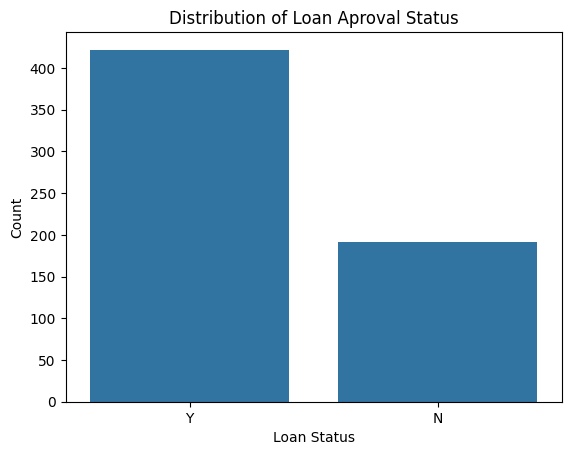

In [281]:
"""Plot the distribution of the target variable
(replace 'Loan_Status' with the actual target column name)"""
sns.countplot(x='Loan_Status', data= train_data)
plt.title('Distribution of Loan Aproval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [282]:
# Count the occurrences of each class in the target variable
class_counts = train_data['Loan_Status'].value_counts()
class_counts

,count
Loan_Status,
Y,422
N,192


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


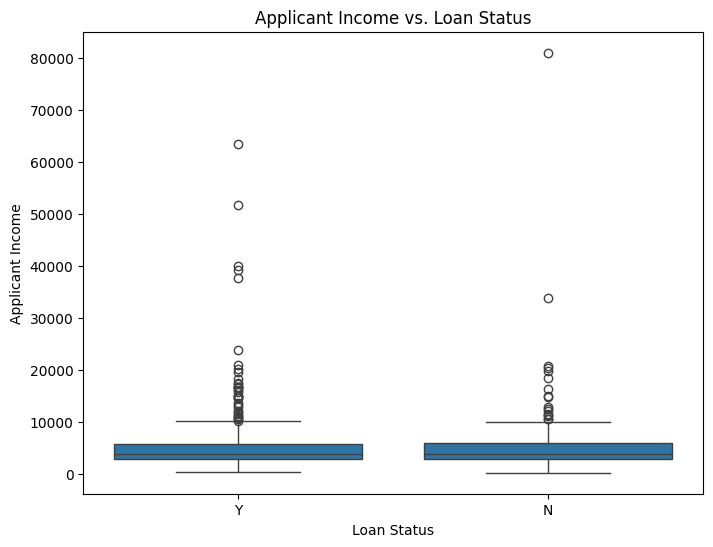

In [283]:
"""Boxplot to explore the relationship between a numeric feature and the
target variable (e.g., ApplicantIncome vs. Loan_Status)"""
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_data)
plt.title('Applicant Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


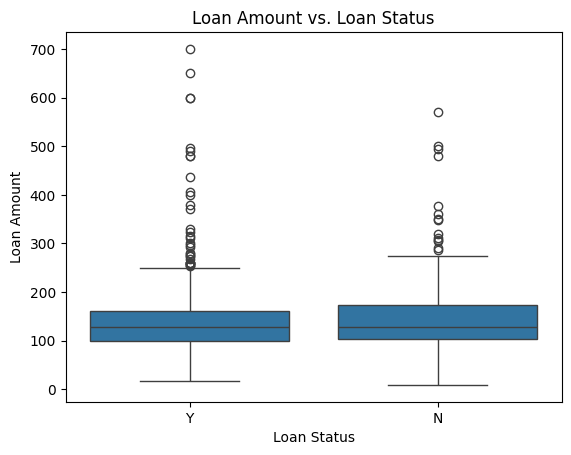

In [284]:
#Similarly for LoanAmount
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data= train_data)
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [285]:
#taking care of the outliers using interquantile or zcored
from re import I
#Calculating Q1 (25th percentile) and Q3 (75th percentile) for ApplicantIncome
q1 = train_data['ApplicantIncome'].quantile(0.25)
q3 = train_data['ApplicantIncome'].quantile(0.75)
Iqr = q3 - q1
Iqr

2917.5

In [286]:
# Defining bounds for outliers
lower_bound = q1 - 1.5 * Iqr
upper_bound = q3 + 1.5 * Iqr

In [287]:
# Filter out rows where ApplicantIncome is outside of the bounds
train_data_clean = train_data[(train_data['ApplicantIncome'] >= lower_bound) & (train_data['ApplicantIncome'] <= upper_bound)]

In [288]:
train_data_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [289]:
#this cleaning output is not bad after taking care of the outlier
print(f"the original train data shape: {train_data.shape}")
print(f"the cleaned train data shape: {train_data_clean.shape}")

the original train data shape: (614, 13)
the cleaned train data shape: (564, 13)


In [290]:
#taking care of outlies on the test
q1 = test_data['ApplicantIncome'].quantile(0.25)
q3 = test_data['ApplicantIncome'].quantile(0.75)
Iqr = q3 - q1
Iqr

2196.0

In [291]:
# Defining bounds for outliers
lower_bound = q1 - 1.5 * Iqr
upper_bound = q3 + 1.5 * Iqr

In [292]:
# Filter out rows where ApplicantIncome is outside of the bounds for the test data
test_data_clean = test_data[(test_data['ApplicantIncome'] >= lower_bound) & (test_data['ApplicantIncome'] <= upper_bound)]

In [293]:
#this cleaning output is not bad after taking care of the outlier for the test data
print(f"the original test data shape: {test_data.shape}")
print(f"the cleaned test data shape: {test_data_clean.shape}")

the original test data shape: (367, 12)
the cleaned test data shape: (335, 12)


In [294]:
#taking care of the outliers on the train data for LoanAmount
from re import I
#Calculating Q1 (25th percentile) and Q3 (75th percentile) for LoanAmount
q1 = train_data['LoanAmount'].quantile(0.25)
q3 = train_data['LoanAmount'].quantile(0.75)
Iqr = q3 - q1
Iqr

64.5

In [295]:
# Defining bounds for outliers
lower_bound = q1 - 1.5 * Iqr
upper_bound = q3 + 1.5 * Iqr

In [296]:
# Filter out rows where LoanAmount is outside of the bounds
train_data_clean_LA = train_data[(train_data['LoanAmount'] >= lower_bound) & (train_data['LoanAmount'] <= upper_bound)]

In [297]:
train_data_clean_LA

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [298]:
print(f"the original train data shape: {train_data.shape}")
print(f"the cleaned train data shape: {train_data_clean_LA.shape}")

the original train data shape: (614, 13)
the cleaned train data shape: (573, 13)


In [299]:
#taking care of the outliers on the test data for LoanAmount
from re import I
#Calculating Q1 (25th percentile) and Q3 (75th percentile) for LoanAmount
q1 = test_data['LoanAmount'].quantile(0.25)
q3 = test_data['LoanAmount'].quantile(0.75)
Iqr = q3 - q1
Iqr

56.5

In [300]:
# Defining bounds for outliers
lower_bound = q1 - 1.5 * Iqr
upper_bound = q3 + 1.5 * Iqr

In [301]:
# Filter out rows where LoanAmount is outside of the bounds
test_data_clean_LA = test_data[(test_data['LoanAmount'] >= lower_bound) & (test_data['LoanAmount'] <= upper_bound)]

In [302]:
test_data_clean_LA

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


In [303]:
print(f"the original test data shape: {test_data.shape}")
print(f"the cleaned test data shape: {test_data_clean_LA.shape}")

the original test data shape: (367, 12)
the cleaned test data shape: (349, 12)


In [304]:
# Select only numerical columns for correlation
numerical_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numerical_columns].corr()

In [305]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [306]:
numerical_cols_test = test_data.select_dtypes(include=['number']).columns
correlation_matrix_test = test_data[numerical_cols_test].corr()

In [307]:
correlation_matrix_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.488737,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150034,-0.008633,-0.058004
LoanAmount,0.488737,0.150034,1.000000,0.091867,-0.012932
Loan_Amount_Term,0.023319,-0.008633,0.091867,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.012932,-0.048189,1.000000


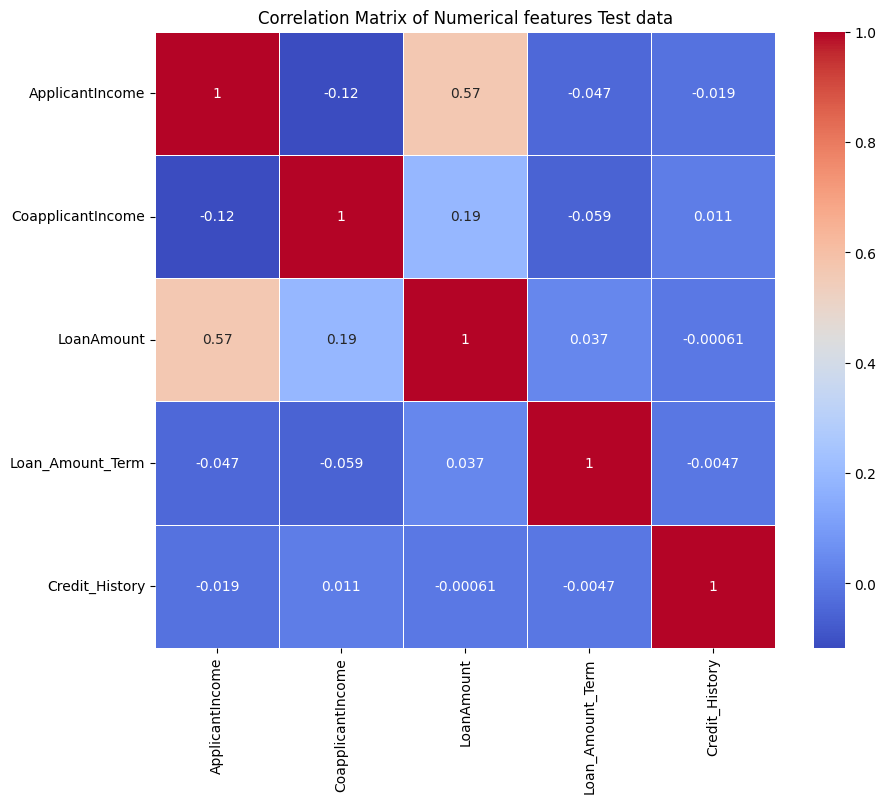

In [308]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical features Test data')
plt.show()

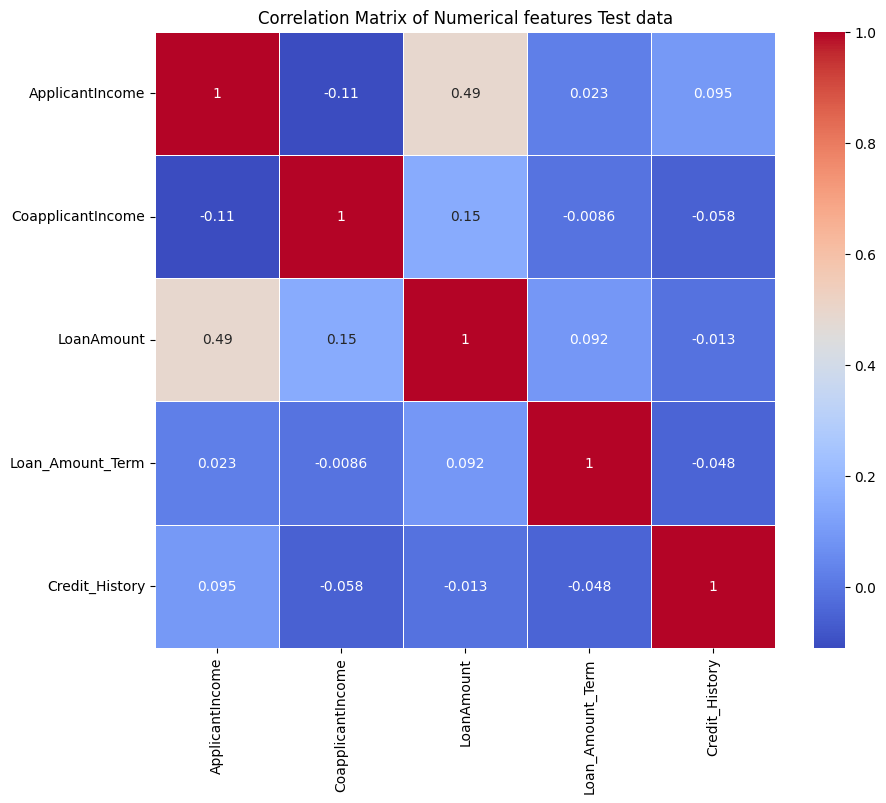

In [309]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical features Test data')
plt.show()

In [310]:
print(train_data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


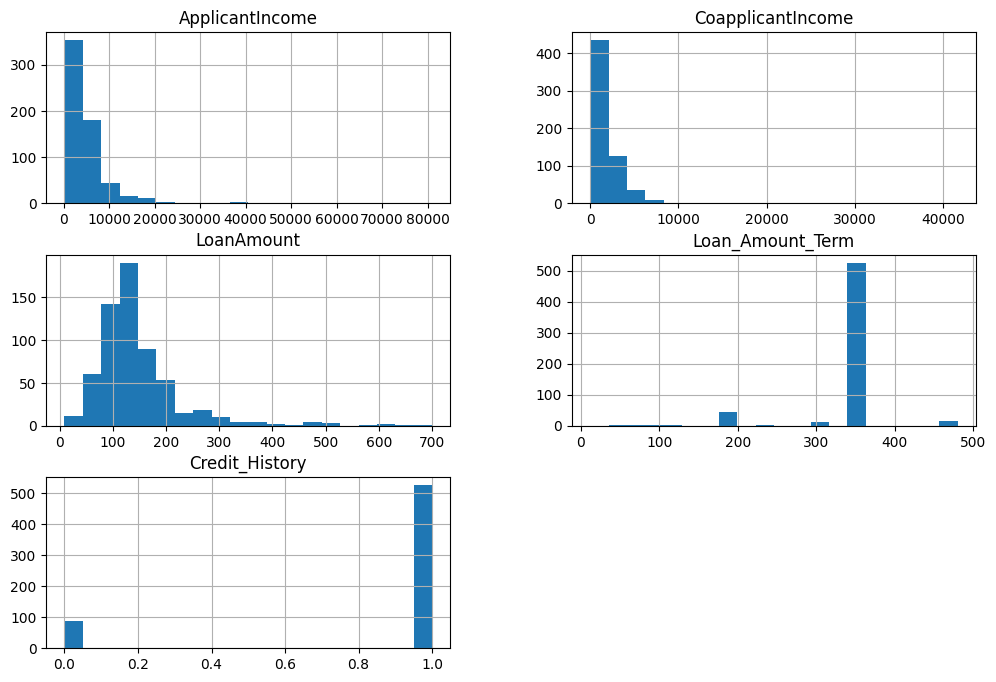

In [311]:
"""Histograms for Numerical Variables (column) (e.g., LoanAmount,
 ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History,)"""
 #plot histograms
train_data.hist(bins = 20, figsize=(12, 8))
plt.show()

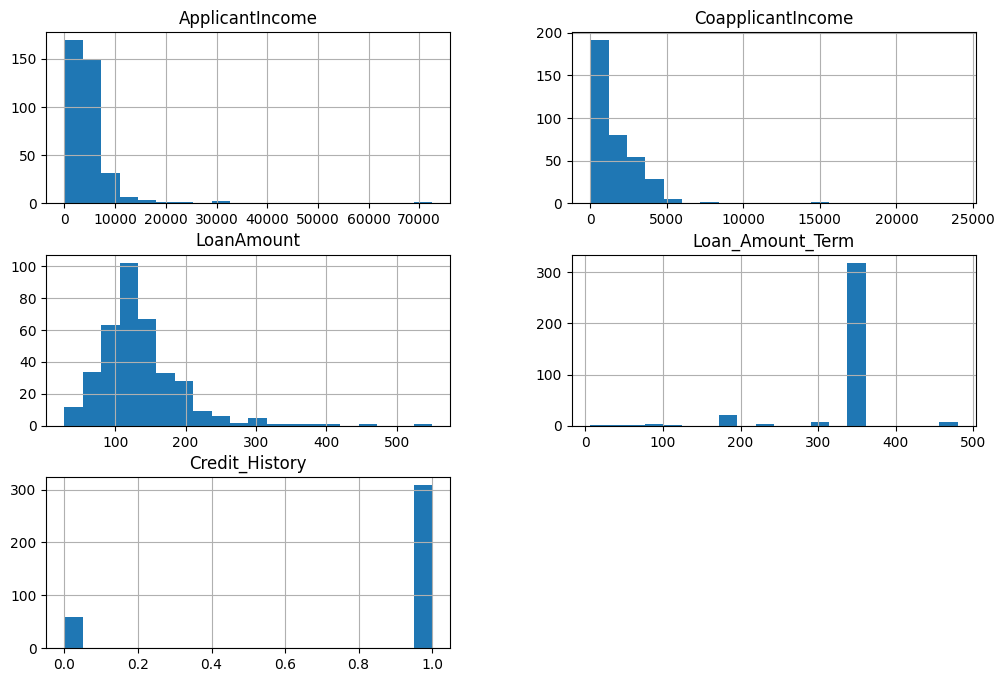

In [312]:
test_data.hist(bins = 20, figsize=(12, 8))
plt.show()

In [313]:
train_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


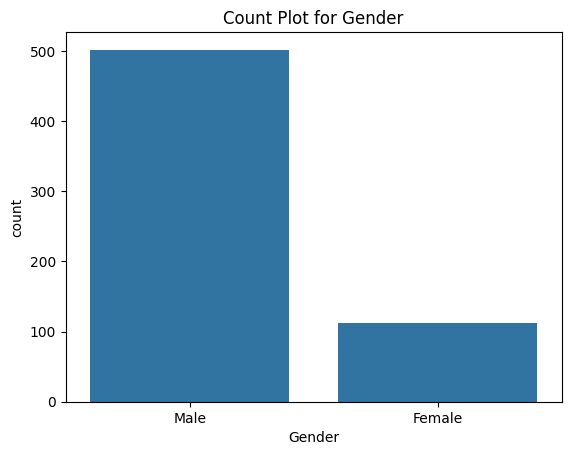

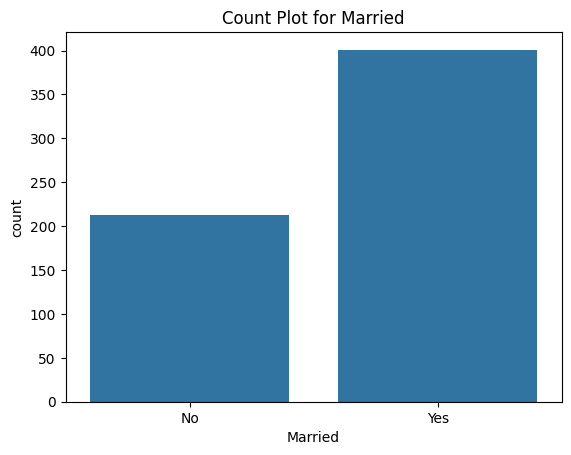

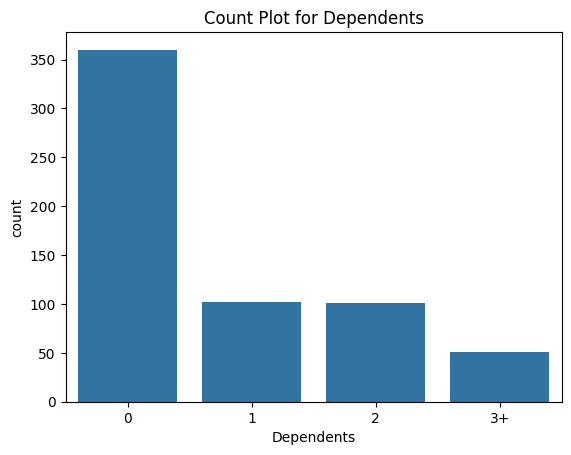

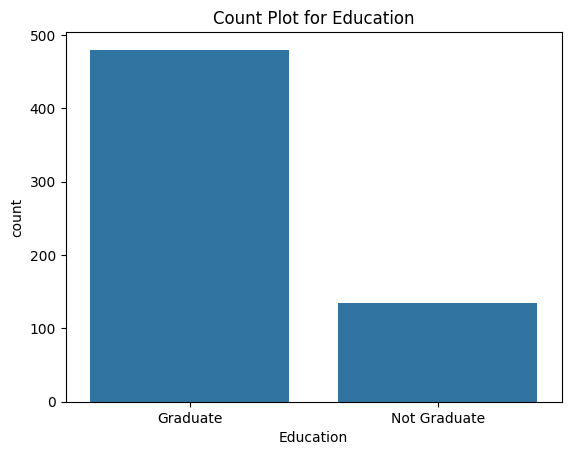

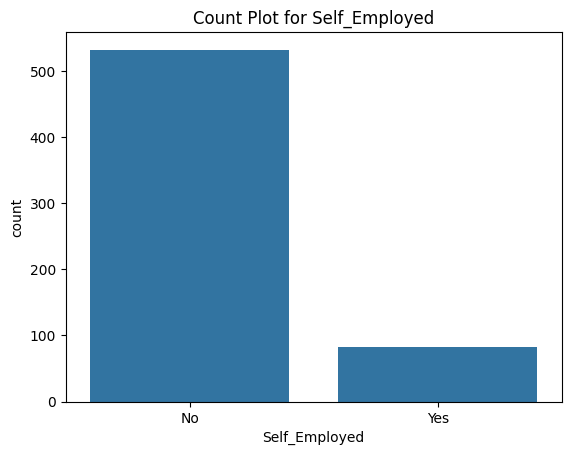

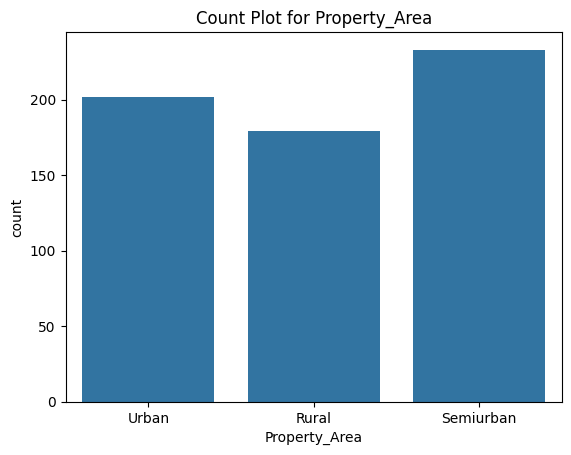

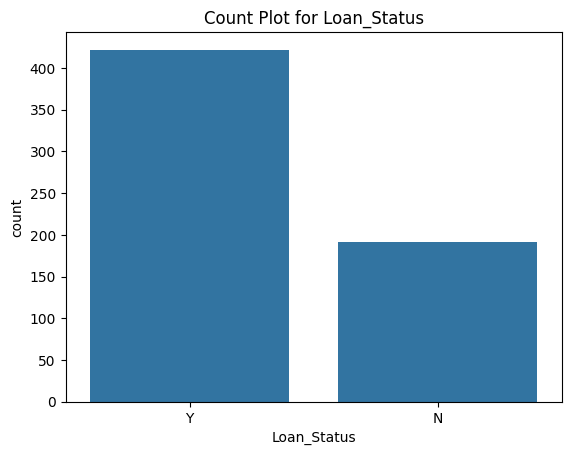

In [314]:
# Defining the categorical columns(excluding Loan_ID, as it is unique for each record)
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Loop through each categorical column and create a count plot
for col in categorical_columns:
    sns.countplot(x=col, data=train_data)
    plt.title(f'Count Plot for {col}')
    plt.show()


In [315]:
test_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


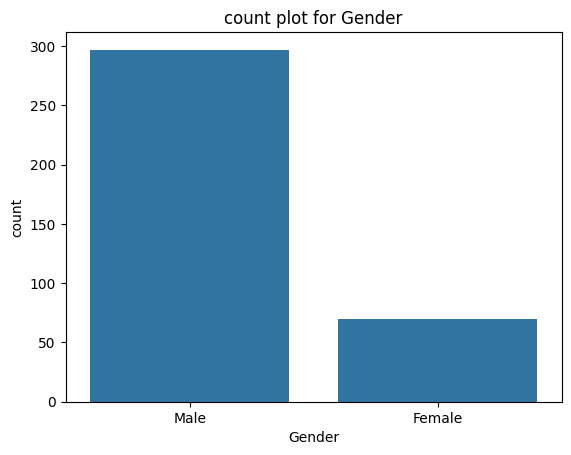

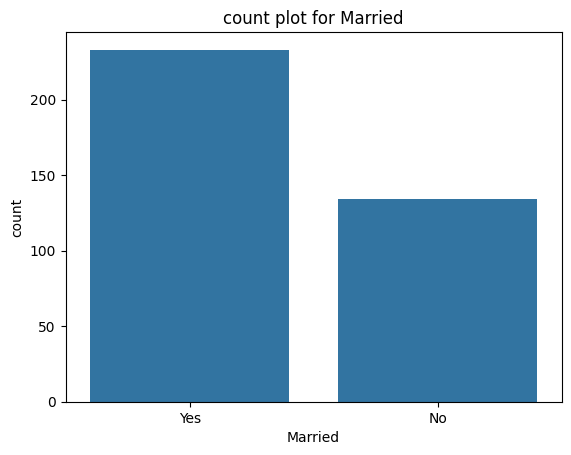

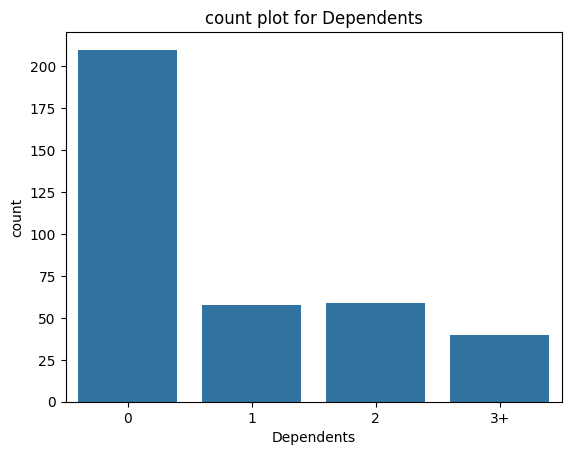

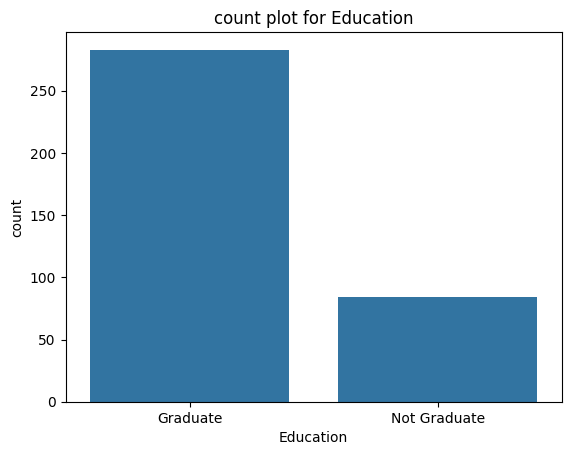

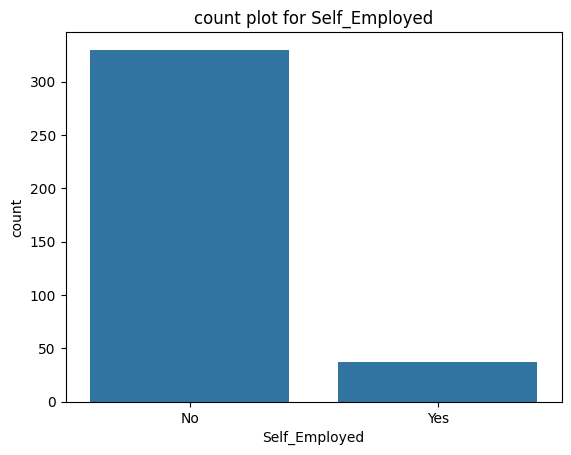

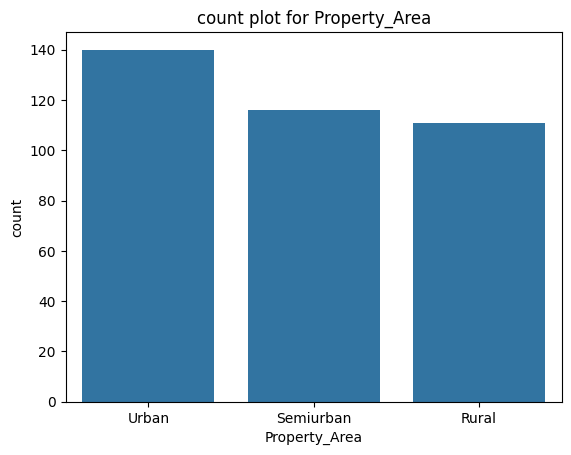

In [316]:
categorical_columns_test = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for colums in categorical_columns_test:
  sns.countplot(x = colums, data = test_data)
  plt.title(f'count plot for {colums}')
  plt.show()

In [317]:
train_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [318]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [319]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [320]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [321]:
"""one hot encoding to change the columns to
numbers before model selection"""
#one hot encoding
#Loan_status should not be encoded because is our model
categorical_columns = ['Gender', 'Married', 'Education',
                       'Self_Employed', 'Property_Area']
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(train_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
train_data_encoded = pd.concat([train_data, encoded_df], axis=1)
train_data_encoded.drop(categorical_columns, axis=1, inplace=True)

In [322]:
train_data_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,128.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,N,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [323]:
train_data_encoded.drop(columns=['Loan_ID'], inplace=True)

In [324]:
# Define features (X) and target (y)
X = train_data_encoded.drop(['Loan_Status'], axis=1)
y = train_data_encoded['Loan_Status']

In [325]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,3000.0,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,6000.0,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [326]:
#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# Identify the column containing '3+' in X_train
for column in X_train.columns:
    if X_train[column].dtype == 'object' and '3+' in X_train[column].unique():
        problematic_column = column
        print(f"Column '{problematic_column}' contains '3+' and needs conversion.")
        break  # Stop searching once the column is found


# Create a mapping dictionary for the ordinal variable
ordinal_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}  # Adjust mapping as needed

# Apply the mapping to both training and testing data
X_train[problematic_column] = X_train[problematic_column].map(ordinal_mapping)
X_test[problematic_column] = X_test[problematic_column].map(ordinal_mapping)

Column 'Dependents' contains '3+' and needs conversion.


In [328]:
X_train['Dependents'].value_counts()

,count
Dependents,
0,293
1,79
2,78
3,41


In [329]:
X_test['Dependents'].value_counts()

,count
Dependents,
0,67
2,23
1,23
3,10


In [330]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [331]:
train_data['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


In [332]:
#Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7642276422764228


In [333]:
#scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [334]:
# Training the model again with scaled data
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [335]:
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(accuracy_scaled)

0.7886178861788617


In [336]:
from sklearn.ensemble import RandomForestClassifier

# Train the model again with scaled data
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7886178861788617


In [337]:
train_data['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [338]:
train_data['Dependents'] = train_data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [339]:
train_data['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3,51


In [340]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [341]:

# Define the categorical columns to encode
categorical_columns = ['Education', 'Self_Employed', 'Gender', 'Married', 'Property_Area']

# Apply one-hot encoding to the selected categorical columns
encoded_data = pd.get_dummies(train_data[categorical_columns], drop_first=True).astype(int)

# Join the encoded columns back to the original train_data
train_data = train_data.drop(columns=categorical_columns)  # Drop original categorical columns
train_data = pd.concat([train_data, encoded_data], axis=1)  # Concatenate the encoded columns

# Display the updated train_data
train_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Not Graduate,Self_Employed_Yes,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,128.0,360.0,1.0,Y,0,0,1,0,0,1
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,N,0,0,1,1,0,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Y,0,1,1,1,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Y,1,0,1,1,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Y,0,0,1,0,0,1


In [342]:
train_data.drop(columns=['Loan_ID'], inplace=True)

In [343]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [344]:
# Assume your dataset is loaded as train_data and test_data
# Assume your dataset is loaded as train_data and test_data
X = train_data.drop(columns=['Loan_Status'])
y = train_data['Loan_Status'].replace({'Y': 1, 'N': 0})  # Target variable

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees
    'max_depth': np.arange(5, 20, 5),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10, 2),  # Minimum samples to split a node
    'min_samples_leaf': np.arange(1, 10, 2),  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2'],  # Features to consider at each split
}

# RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Train the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = random_search.best_params_
print(f"Best Parameters: {best_params_rf}")

# Train RandomForest with best parameters
model_rf_tuned = RandomForestClassifier(**best_params_rf)
model_rf_tuned.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf_tuned = model_rf_tuned.predict(X_test_scaled)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees
    'max_depth': np.arange(5, 20, 5),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10, 2),  # Minimum samples to split a node
    'min_samples_leaf': np.arange(1, 10, 2),  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2'],  # Features to consider at each split
}

# RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Train the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = random_search.best_params_
print(f"Best Parameters: {best_params_rf}")

# Train RandomForest with best parameters
model_rf_tuned = RandomForestClassifier(**best_params_rf)
model_rf_tuned.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf_tuned = model_rf_tuned.predict(X_test_scaled)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<ipython-input-344-cbfc79ba4e84>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = train_data['Loan_Status'].replace({'Y': 1, 'N': 0})  # Target variable
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 5}
Tuned Random Forest Accuracy: 0.7886178861788617
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 5}
Tuned Random Forest Accuracy: 0.7886178861788617


In [345]:
y_pred_rf_tuned = model_rf_tuned.predict(X_train_scaled)
accuracy_rf_tuned = accuracy_score(y_train, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

Tuned Random Forest Accuracy: 0.814663951120163


In [346]:
import pickle

In [347]:
# Save the model
with open('loan_prediction_problem_model.pkl', 'wb') as model_file:
    pickle.dump(model_rf_tuned, model_file)